# Project: Expnatory data analysis for No Show

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Not showing up is an issue that can increase the bottlenecks in the healthcare system. The No Show dataset conatins 100,000+ appointments along with demograghic and health infromation about the patinets. 
>
**The main aim of this analysis is to invesitgate determinates of missing medical appointments.** The analysis attempt to answer the following questions 
>
>**1) What are the demographic pridectors for missing a medical appointment?**
>
>**2) What are the health related pridectors for missing a medical appointment?**
>
> The dataset has 13 coloumns, the following is the description of the variables included in the dataset:
>>**PatientId** is a unique identifier for the patients in the dataset
>
>>**AppointmentID** is a unique identifier for the booking episode in the dataset
>
>>**Gender** is the gender of the patinet 
>
>>**ScheduledDay** is the date and time of booking 
>
>>**AppointmentDay** is the date and time of actual appointment 
>
>>**Age** is the age of the patient 
>
>>**Scholarship** is whether the patient is covered under a health insurance
>
>>**Hypertension** is whether the patient has Hypertension 
>
>>**Diabetes** is whether the patient has Diabetes 
>
>>**Alcoholism** is whether the patient suffers from an alcohol problem 
>
>>**Handicap** is the level of disability of the patient 
>
>>**SMS received** indicates if the patient recievd a reminder for the appointment via SMS 
>
>>**No-show** this vraible describes whethere the patient showed up for the appoint or not. To avoid counter-intuation, this variable will be recoded as a new varible called **Showed** where *Yes* means the patient showed up for the medical appointment and *No* means that the patient did not show up.

The following features have been engineered:

>>**No_of_Appointments** indicates the number of appointemnts each patient has 
>
>>**AppointmentWeekDay** indicates which day of the week was the appointment on 
>
>>**WaitingTime** indicates the difference between schedualing date and appointment date 

<a id='wrangling'></a>
## Data Wrangling

After importing the required dataset and packages, a data validation/assessment steps were taken including:

1. **Checking for missing data**
 * No missing data was observed all the variables have 110527 non-null records

2. **Checking for duplicated records**
 * No records were duplicated 

3. **Checking data types**
 * **Data Cleaning Steps**:  
 * **ScheduledDay** and **AppointmentDay** were not in date formate and were changed to date format 
 * **No-show** was counter intuitive so, it was changed to **Showed** variable and the type was mapped as intger to facilitate later analysis steps
 * **Gender** was transformed from object to intger to facilitate later analysis steps 
 

4. **Checking variables names**
 * **Handcap and Hipertension** were misspelled and were then later renamed as **Handicap and Hypertension**
 

5. **Engineering new features**
 * **No_of_Appointments** claculating number of appointment for each patient
 * **AppointmentWeekDay** incicate the week day 
 * **WaitingTime** calculated by subtracting the appointemnt date from the booking date 
 
**Additional validation and cleaning steps**

 * **in Age variable** there was one record with -1 age and this record was set to the mean of age variable 
 * **in WaitingTime variable** there were several records in which the appointment date were preceeding the booking date, Thus these records were droped. 






### Importing the data and invesigating its general Properties

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import autoimpute as imp

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [5]:
#import data set (for reproduacbility, usually prefer using the URL)
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"
df=pd.read_csv(url,sep=',')

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
df.shape

(110527, 14)

### Checking for missing data 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
columns=['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap','SMS_received','No-show']
for i in columns:
    na_counts=df[i].isna().value_counts()
    print(na_counts)

False    110527
Name: PatientId, dtype: int64
False    110527
Name: AppointmentID, dtype: int64
False    110527
Name: Gender, dtype: int64
False    110527
Name: ScheduledDay, dtype: int64
False    110527
Name: AppointmentDay, dtype: int64
False    110527
Name: Age, dtype: int64
False    110527
Name: Neighbourhood, dtype: int64
False    110527
Name: Scholarship, dtype: int64
False    110527
Name: Hipertension, dtype: int64
False    110527
Name: Diabetes, dtype: int64
False    110527
Name: Alcoholism, dtype: int64
False    110527
Name: Handcap, dtype: int64
False    110527
Name: SMS_received, dtype: int64
False    110527
Name: No-show, dtype: int64


1. **Checking for missing data**
 * **No missing data** was observed all the variables have 110527 non-null records

In [11]:
df.duplicated().sum()

0

2. **Checking for duplicated records**
 * **No records** were duplicated 

In [12]:
df['PatientId'].nunique()

62299

In [13]:
df['AppointmentID'].nunique()

110527

### Investigating Data Types 

In [14]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [15]:
type(df['Gender'][0])

str

In [16]:
type(df['Neighbourhood'][0])

str

In [17]:
type(df['No-show'][0])

str

### Data Cleaning

**Assigning the variable to the right data type**

In [18]:
df['PatientId']=df['PatientId'].astype('float64')
df['AppointmentID']=df['AppointmentID'].astype('float64')
df['Gender']=df['Gender'].astype('object').map( {"M": 1, "F": 2}) 
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['Age']=df['Age'].astype('int64')
df['Neighbourhood']=df['Neighbourhood'].astype('object')
df['Scholarship']=df['Scholarship'].astype('int64')
df['Hipertension']=df['Hipertension'].astype('int64')
df['Diabetes']=df['Diabetes'].astype('int64')
df['Alcoholism']=df['Alcoholism'].astype('int64')
df['Handcap']=df['Handcap'].astype('int64')
df['SMS_received']=df['SMS_received'].astype('int64')
df['No-show']=df['No-show'].astype('object')

**Recoding the No-Show variable to Showed**

In [19]:
df['Showed']=df['No-show'].map({'Yes':'No', 'No':'Yes'})

In [20]:
df.drop('No-show', axis=1, inplace=True)

In [21]:
df['Showed']=df['Showed'].map({'Yes':1, 'No':0})

In [22]:
df['Showed'].dtypes

dtype('int64')

**Checking data types**
 * **Data Cleaning Steps**:  
 * **ScheduledDay** and **AppointmentDay** were not in date formate and were changed to date format 
 * **No-show** was counter intuitive so, it was changed to **Showed** variable and the type was mapped as intger to facilitate later analysis steps
 * **Gender** was transformed from object to intger to facilitate later analysis steps 
 

In [23]:
df.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension'}, inplace=True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,2.987250e+13,5642903.0,2,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503.0,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549.0,2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828.0,2,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494.0,2,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768.0,2,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093.0,2,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692.0,2,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323.0,2,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1


4. **Checking variables names**
 * **Handcap and Hipertension** were misspelled and were then later renamed as **Handicap and Hypertension**
 

**Investigating the age variable**

In [24]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There is **nothing called the minimum age of the patient is -1!**

In [25]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
99832,4.659432e+14,5775010.0,2,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [26]:
df['PatientId'][df['Age']==-1]

99832    4.659432e+14
Name: PatientId, dtype: float64

In [27]:
df.iloc[99832,0]

465943158731293.0

In [28]:
df[df['PatientId']==465943158731293.0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
99832,4.659432e+14,5775010.0,2,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


luckily, only one patient had this wrong record, so I will replace it with the mean age 

In [29]:
df['Age'].replace(-1, df['Age'].mean(), inplace=True)

**Calculating the number of appointments per patient**

In [30]:
PID=df.groupby(by='PatientId')['ScheduledDay'].nunique()
N_oft=pd.DataFrame(PID)
N_oft.reset_index(inplace=True)


In [31]:
df=pd.merge(df,N_oft, on="PatientId", how='right')

In [32]:
df.rename(columns={'ScheduledDay_x':'ScheduledDay', 'ScheduledDay_y':'No_of_appointments'}, inplace=True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed,No_of_appointments
0,3.921784e+04,5751990.0,2,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44.0,PRAIA DO SUÁ,0,0,0,0,0,0,1,1
1,4.374176e+04,5760144.0,1,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39.0,MARIA ORTIZ,0,0,1,0,0,0,1,1
2,9.377953e+04,5712759.0,2,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33.0,CENTRO,0,0,0,0,0,0,1,1
3,1.417242e+05,5637648.0,1,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12.0,FORTE SÃO JOÃO,0,0,0,0,0,0,1,1
4,5.376153e+05,5637728.0,2,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14.0,FORTE SÃO JOÃO,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,9.999320e+14,5772701.0,1,2016-06-03 16:04:03+00:00,2016-06-07 00:00:00+00:00,90.0,JABOUR,0,0,0,0,0,1,1,5
110523,9.999350e+14,5639453.0,1,2016-04-29 09:07:06+00:00,2016-04-29 00:00:00+00:00,5.0,JESUS DE NAZARETH,0,0,0,0,0,0,1,1
110524,9.999465e+14,5649678.0,1,2016-05-03 07:08:13+00:00,2016-05-03 00:00:00+00:00,65.0,SÃO PEDRO,1,1,0,0,0,0,1,1
110525,9.999686e+14,5740680.0,2,2016-05-25 15:51:24+00:00,2016-05-25 00:00:00+00:00,81.0,JARDIM CAMBURI,0,0,0,0,0,0,1,1


**The day of the appointment**

In [33]:
df['AppointmentWeekDay']=df['AppointmentDay'].dt.weekday

**Calculating the waiting time between schedualing the appoitntment and actual appointment**

In [34]:
df['WaitingTime']=df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date
df['WaitingTime']

0        3 days
1        0 days
2        0 days
3        3 days
4        7 days
          ...  
110522   4 days
110523   0 days
110524   0 days
110525   0 days
110526   0 days
Name: WaitingTime, Length: 110527, dtype: timedelta64[ns]

**Validating that there the diffrence between the appointemnt data and the booking date is not less than 0**

In [35]:
dfTemp=df[df['WaitingTime'].astype(int)<0]
dfTemp

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed,No_of_appointments,AppointmentWeekDay,WaitingTime
26698,3.787482e+12,5655637.0,1,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7.0,TABUAZEIRO,0,0,0,0,0,0,0,5,1,-1 days
39331,7.839273e+12,5679978.0,1,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38.0,RESISTÊNCIA,0,0,0,0,1,0,0,5,0,-1 days
39555,7.896294e+12,5715660.0,2,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19.0,SANTO ANTÔNIO,0,0,0,0,1,0,0,8,1,-1 days
51987,2.425226e+13,5664962.0,2,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22.0,CONSOLAÇÃO,0,0,0,0,0,0,0,2,2,-1 days
110457,9.982316e+14,5686628.0,2,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81.0,SANTO ANTÔNIO,0,0,0,0,0,0,0,3,3,-6 days


**There are five records with wrong appointment and schedualing date, so I will drop the wrong values**

In [36]:
df.drop(dfTemp.index, inplace=True)

In [37]:
df[df['WaitingTime'].astype(int)<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed,No_of_appointments,AppointmentWeekDay,WaitingTime


#### Checking that the variables are in the desired format 

In [38]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed,No_of_appointments,AppointmentWeekDay,WaitingTime
0,39217.84439,5751990.0,2,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44.0,PRAIA DO SUÁ,0,0,0,0,0,0,1,1,4,3 days
1,43741.75652,5760144.0,1,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39.0,MARIA ORTIZ,0,0,1,0,0,0,1,1,2,0 days
2,93779.52927,5712759.0,2,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33.0,CENTRO,0,0,0,0,0,0,1,1,2,0 days
3,141724.16655,5637648.0,1,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12.0,FORTE SÃO JOÃO,0,0,0,0,0,0,1,1,0,3 days
4,537615.28476,5637728.0,2,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14.0,FORTE SÃO JOÃO,0,0,0,0,0,1,1,1,4,7 days


5. **Engineering new features**
 * **No_of_Appointments** claculating number of appointment for each patient
 * **AppointmentWeekDay** indicates the week day 
 * **WaitingTime** calculated by subtracting the appointemnt date from the booking date 
 

<a id='eda'></a>
## Exploratory Data Analysis

> **The aim of this analysis** is to investigate the demographics and health determinates that could be predictors for missing a medical appointment.

### Research Question 1 What are the demographic determinates of not showing up?

*Creating a labelling function*

In [39]:
def Labelling_func(xlab, ylab, title):
    """Labelling function: add the x and y lables and add a title to each plot 
    """
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()

**Exploring the role of age**

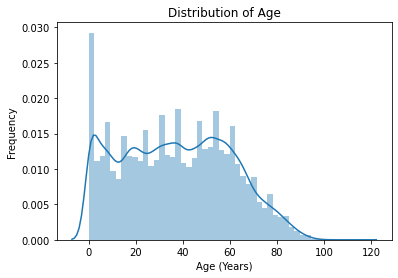

In [40]:
g=sns.distplot(df['Age']);
Labelling_func("Age (Years)","Frequency", "Distribution of Age")

Newborns (0 years olds) have the highest frequency in the data

**Which age groups have more frquent appointments?**

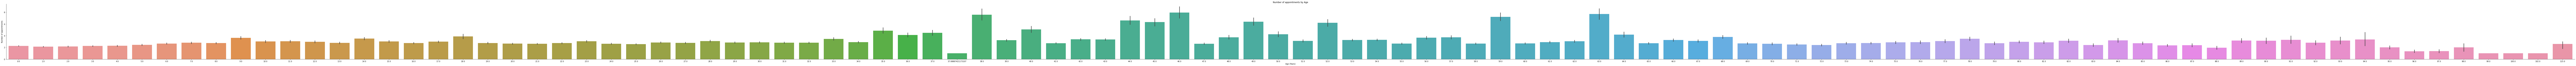

In [41]:
sns.catplot(data=df, x="Age", y="No_of_appointments", kind="bar", aspect=40);
Labelling_func("Age (Years)","Number of appointments", "Number of appointments by Age")

Apperently, middle-aged patinet tend to have more frequent appointments 

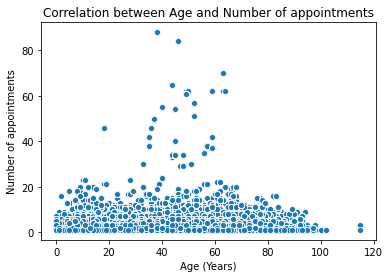

In [42]:
sns.scatterplot(data=df, x="Age", y="No_of_appointments");
Labelling_func("Age (Years)","Number of appointments", "Correlation between Age and Number of appointments")

It seems to be **no linear correlation** between age and the number of appointments 

**Are there any observed difference in missing medical appointments that can be explained by age?**

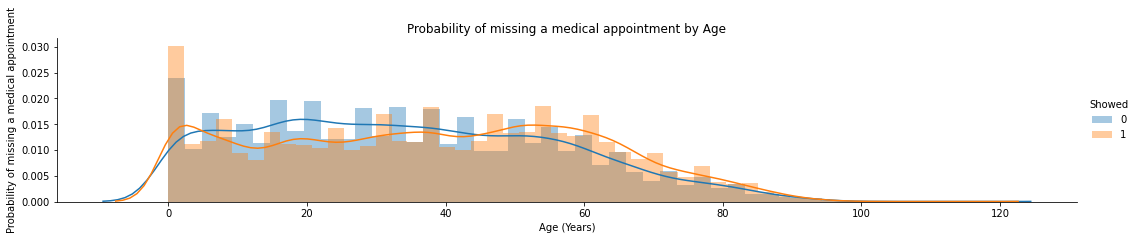

In [43]:
g=sns.FacetGrid(data=df,hue="Showed", aspect=5);
g.map(sns.distplot,'Age');
g.add_legend();
Labelling_func("Age (Years)","Probability of missing a medical appointment", "Probability of missing a medical appointment by Age")

**Children** and **those aged 50 and more** tend show up more for thier appontiments if compared to adolecents and adults 

**What about Gender?**

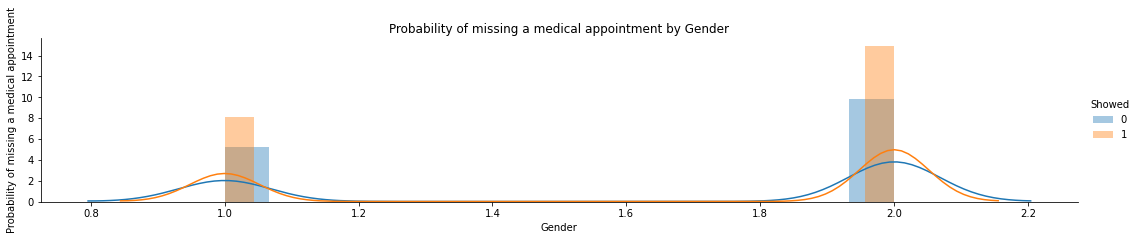

In [44]:
g=sns.FacetGrid(data=df,hue="Showed", aspect=5);
g.map(sns.distplot,'Gender');
g.add_legend();
Labelling_func("Gender","Probability of missing a medical appointment", "Probability of missing a medical appointment by Gender")

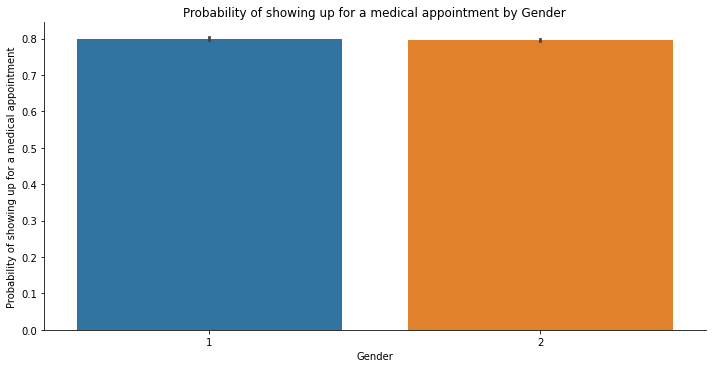

In [45]:
sns.catplot(data=df, kind="bar", x="Gender", y="Showed", aspect=2);
Labelling_func("Gender","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Gender")

In [46]:
pd.crosstab(df.Gender, df.Showed).apply(lambda x: x/x.sum(), axis=1)

Showed,0,1
Gender,,
1,0.199638,0.800362
2,0.203113,0.796887


There are more **females** in the datasets.
There is **no subtsntial differnce** in missing midcal appointment up by Gender 

**Does missing appointments can be explained by having a health insurance?**

/Users/keyrellousadib/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/keyrellousadib/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


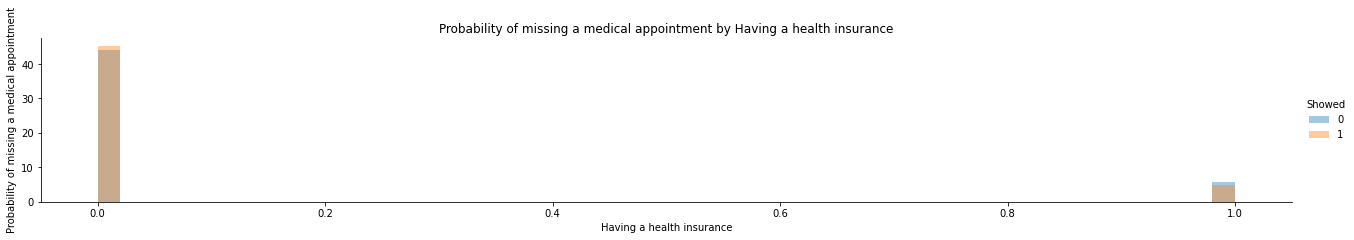

In [47]:
g=sns.FacetGrid(data=df,hue="Showed", aspect=6);
g.map(sns.distplot,'Scholarship');
g.add_legend();
Labelling_func("Having a health insurance","Probability of missing a medical appointment", "Probability of missing a medical appointment by Having a health insurance")

In [48]:
pd.crosstab(df.Scholarship, df.Showed).apply(lambda x: x/x.sum(), axis=1)

Showed,0,1
Scholarship,,
0,0.198031,0.801969
1,0.237363,0.762637


Those with health insurance (aka Scholarship) tend to miss their appointments more!

**What are the highest Neighbourhoods in terms of missing medical appointments?**

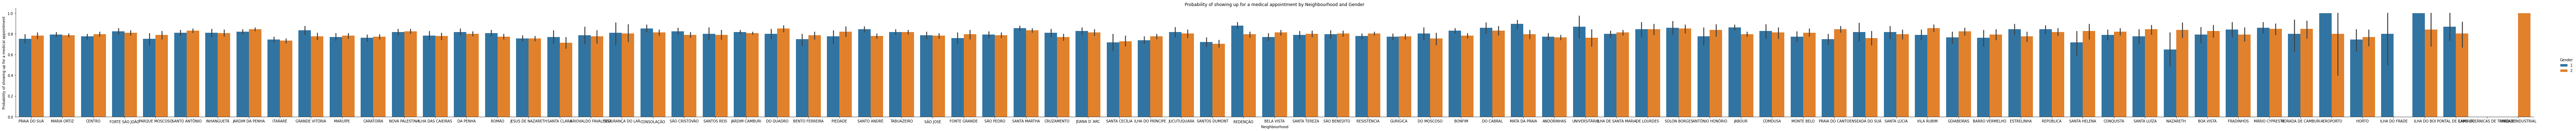

In [49]:
sns.catplot(data=df, kind="bar", x="Neighbourhood", y="Showed", hue="Gender",aspect=20)
Labelling_func("Neighbourhood","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Neighbourhood and Gender")

In [50]:
X=pd.crosstab(df.Neighbourhood, df.Showed).apply(lambda x: x/x.sum(), axis=1)
X=pd.DataFrame(X)
X.reset_index(inplace=True)
X = X.rename(columns = {'index':'Neighbourhood'})
X.sort_values(0, ascending=[0], inplace=True)

In [51]:
X.head(5)


Showed,Neighbourhood,0,1
34,ILHAS OCEÂNICAS DE TRINDADE,1.000000,0.000000
70,SANTOS DUMONT,0.289185,0.710815
61,SANTA CECÍLIA,0.274554,0.725446
62,SANTA CLARA,0.264822,0.735178
36,ITARARÉ,0.262664,0.737336


In [52]:
df["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

As we can see that **ILHAS OCEÂNICAS DE TRINDADE** has the highest proportion of missing appointments followed by **SANTOS DUMONT**, and **SANTA CECÍLIA**. Yet it is important to note that the sample size for **ILHAS OCEÂNICAS DE TRINDADE** is very small. Most of the Neighbourhood lies between 13% to 29% No show. 

**Is there a specific pattern of missing medical appointments explained by Weekdays?**

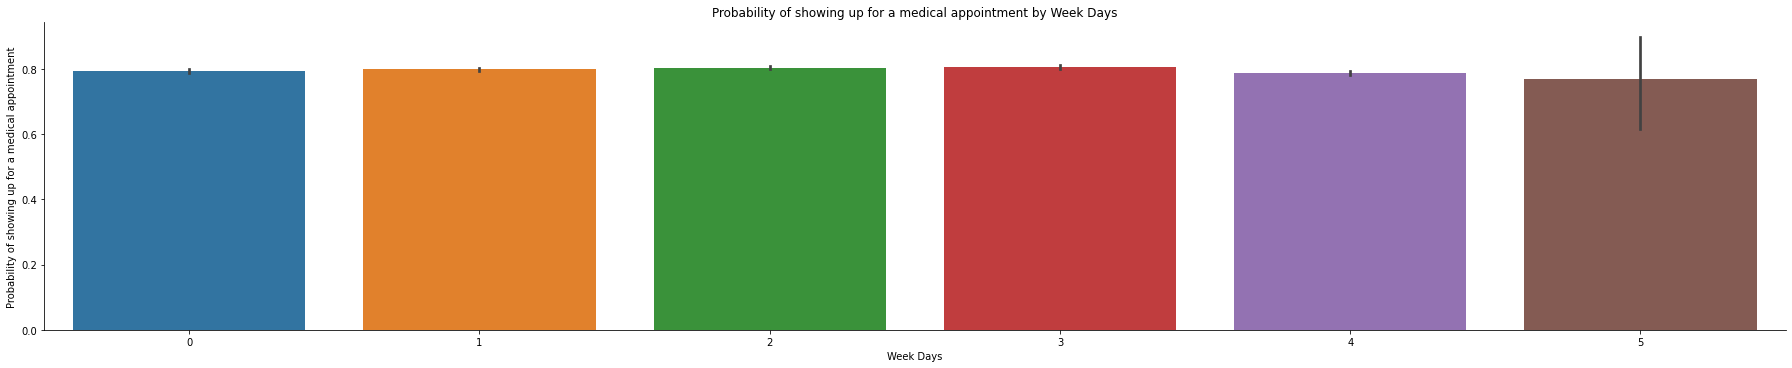

In [53]:
sns.catplot(data=df, kind="bar", x="AppointmentWeekDay", y="Showed", aspect=5);
Labelling_func("Week Days","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Week Days")


Apperently, there is **no much variation** in the probaility of missing medical appointment that can be explained by weekdays 

**Can the waiting time contribute to missing a medical appointment?**

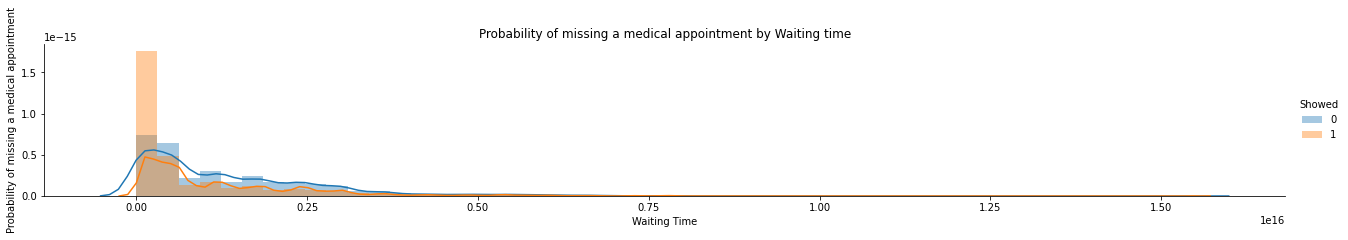

In [54]:
g = sns.FacetGrid(df, hue="Showed", aspect=6);
g.map(sns.distplot,"WaitingTime");
g.add_legend();
Labelling_func("Waiting Time","Probability of missing a medical appointment", "Probability of missing a medical appointment by Waiting time")

In [55]:
X=pd.crosstab(df.WaitingTime, df.Showed).apply(lambda x: x/x.sum(), axis=1)
X=pd.DataFrame(X)
X

Showed,0,1
WaitingTime,,
0 days,0.046469,0.953531
1 days,0.213505,0.786495
2 days,0.238216,0.761784
3 days,0.235294,0.764706
4 days,0.232703,0.767297
...,...,...
155 days,0.600000,0.400000
162 days,0.181818,0.818182
169 days,0.125000,0.875000


Those who book on the same day tend to **show up more** for their appointments

**Are there any Seasonal variation in the appointments?**

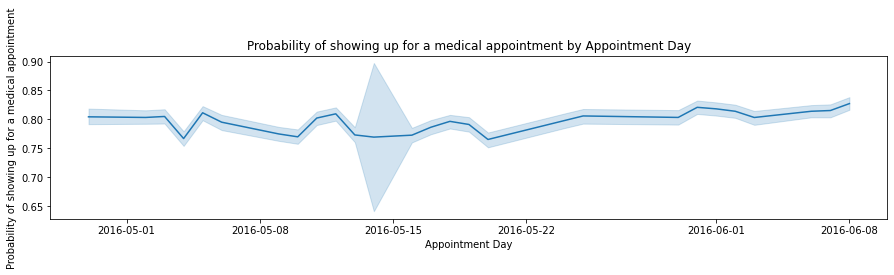

In [53]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df, x="AppointmentDay", y="Showed");
Labelling_func("Appointment Day","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Appointment Day")


There seem to be **no major differnce overall** in missing medical appointments over the time period included in the dataset

**Does the number of appointments act as a pridector of missing a medical appointment?**

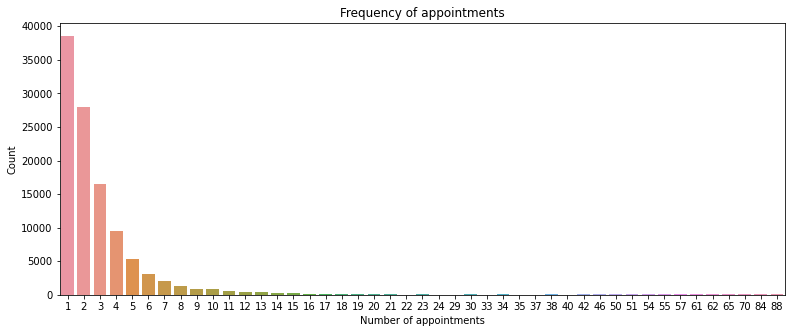

In [54]:
plt.figure(figsize = (13,5))
sns.countplot(data=df,x='No_of_appointments');

Labelling_func("Number of appointments","Count", "Frequency of appointments")

In [55]:
X=pd.crosstab(df.No_of_appointments, df.Showed).apply(lambda x: x/x.sum(), axis=1)
X=pd.DataFrame(X)
X.reset_index(inplace=True)


<Figure size 936x360 with 0 Axes>

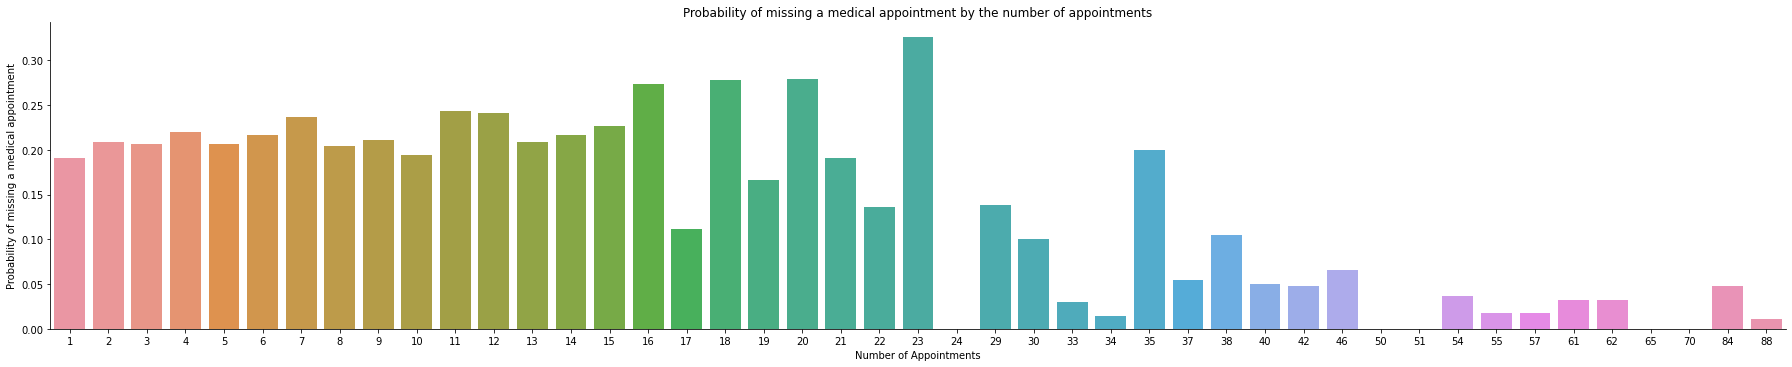

In [56]:
plt.figure(figsize = (13,5));
sns.catplot(data=X, kind="bar", x="No_of_appointments", y=0, aspect=5);

Labelling_func("Number of Appointments","Probability of missing a medical appointment", "Probability of missing a medical appointment by the number of appointments")

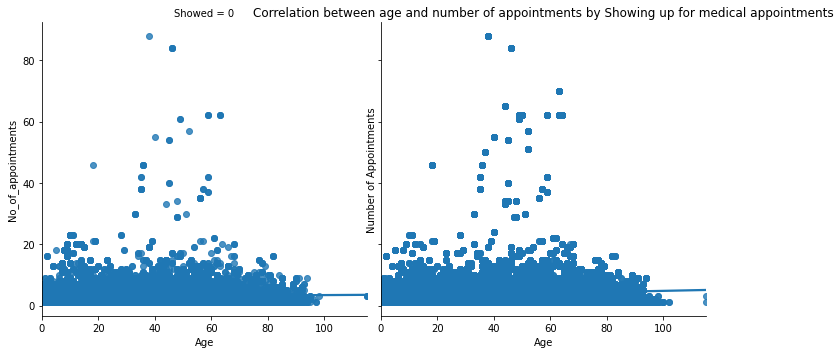

In [57]:
sns.lmplot(data=df, x='Age', y='No_of_appointments', col='Showed');

Labelling_func("Age","Number of Appointments", "Correlation between age and number of appointments by Showing up for medical appointments")

In the data **the highest frequency** was for patinets with only one appointment. 

It seems that **after a certain cut-off of 35 appointmets**, the probability of missing appointments decreases 

Also it deems that thre is **no linear correlation** between age and the number of appointments 

**Would reciving a reminder would help in decreasing the probability of missing a medical appointment?**

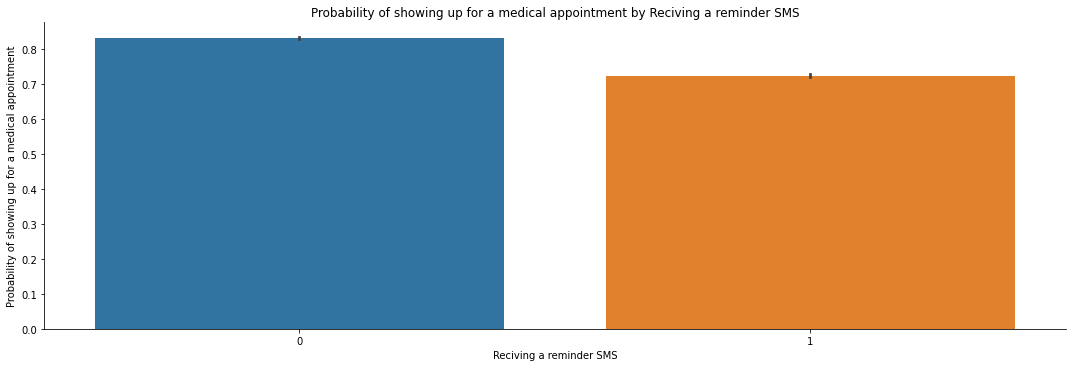

In [58]:
sns.catplot(data=df, kind="bar", x="SMS_received", y="Showed",aspect=3);
Labelling_func("Reciving a reminder SMS","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Reciving a reminder SMS")


In [59]:
pd.crosstab(df.SMS_received, df.Showed).apply(lambda x: x/x.sum(), axis=1)

Showed,0,1
SMS_received,,
0,0.166978,0.833022
1,0.275745,0.724255


SMS reminders seem to have **a negative impact** on showing up to medical appointments

### Research Question 2: What are the health determinates of not showing up for medical appointments? 

Looking at the impact of diffrent diseases and disability levels on missing medical appointments.

**Impact of Hypertension**

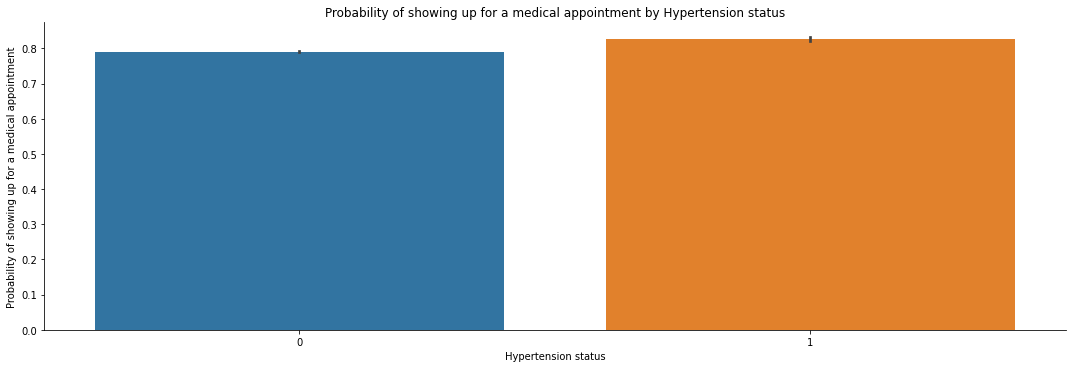

In [60]:
sns.catplot(data=df, kind="bar", x="Hypertension", y="Showed",aspect=3);
Labelling_func("Hypertension status","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Hypertension status")

In [61]:
pd.crosstab(df.Hypertension, df.Showed).apply(lambda x: x/x.sum(), axis=1)


Showed,0,1
Hypertension,,
0,0.208992,0.791008
1,0.173020,0.826980


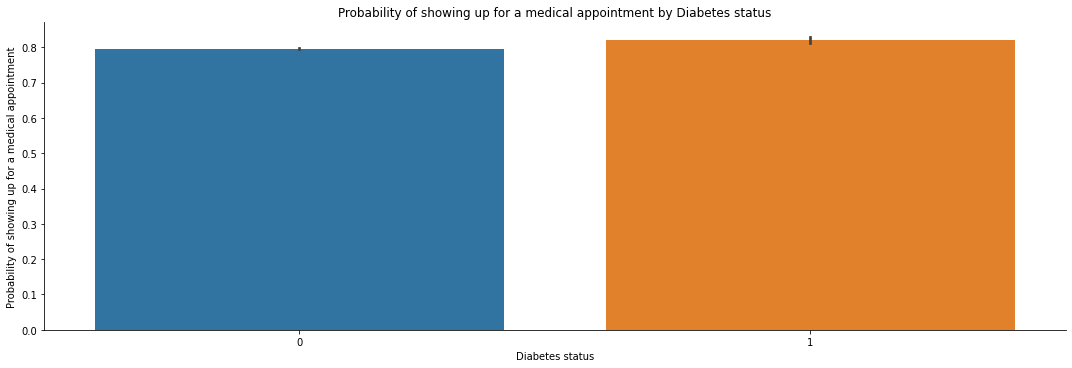

In [62]:
sns.catplot(data=df, kind="bar", x="Diabetes", y="Showed",aspect=3);

Labelling_func("Diabetes status","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Diabetes status")


In [63]:
pd.crosstab(df.Diabetes, df.Showed).apply(lambda x: x/x.sum(), axis=1)

Showed,0,1
Diabetes,,
0,0.203589,0.796411
1,0.180033,0.819967


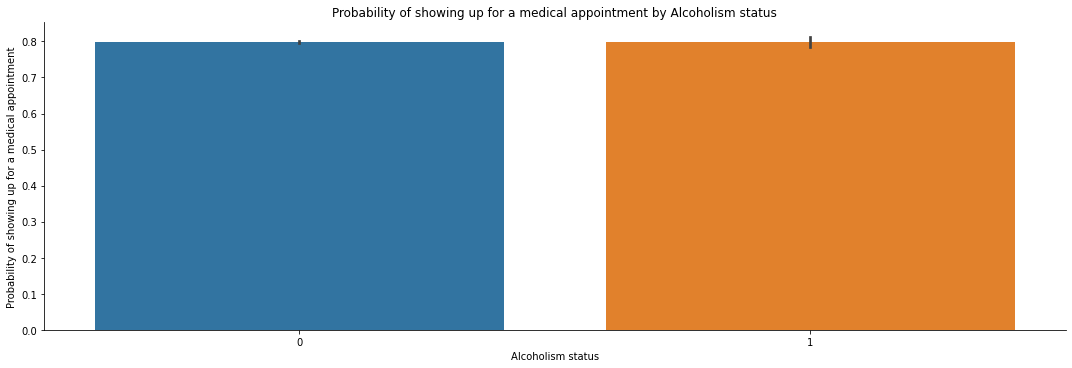

In [64]:
sns.catplot(data=df, kind="bar", x="Alcoholism", y="Showed",aspect=3);
Labelling_func("Alcoholism status","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Alcoholism status")


In [65]:
pd.crosstab(df.Alcoholism, df.Showed).apply(lambda x: x/x.sum(), axis=1)

Showed,0,1
Alcoholism,,
0,0.201909,0.798091
1,0.201488,0.798512


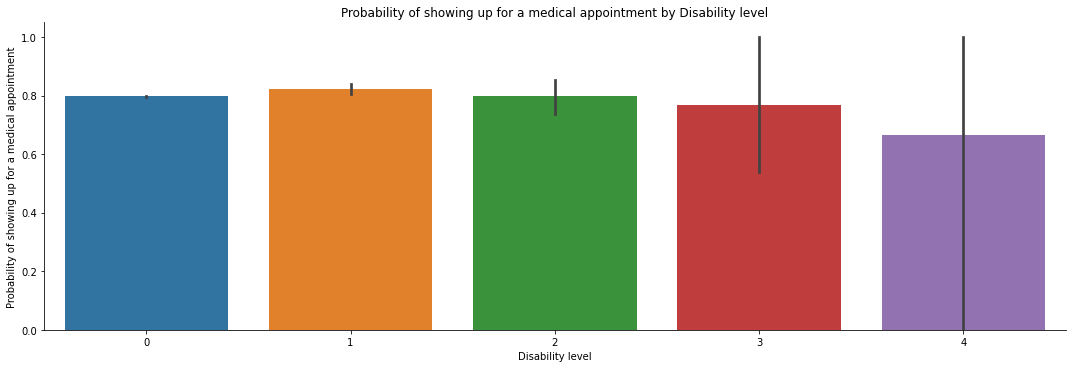

In [66]:
sns.catplot(data=df, kind="bar", x="Handicap", y="Showed",aspect=3);
Labelling_func("Disability level","Probability of showing up for a medical appointment", "Probability of showing up for a medical appointment by Disability level")


In [67]:
pd.crosstab(df.Handicap, df.Showed).apply(lambda x: x/x.sum(), axis=1)

Showed,0,1
Handicap,,
0,0.202331,0.797669
1,0.178431,0.821569
2,0.202186,0.797814
3,0.230769,0.769231
4,0.333333,0.666667


It seems that there are **no substantial differences** in the patterns of missing medical appointments for patinets with or without hypertension, diabetes or struggling with alcohol problems. It is important to note though that, as the level of handicap **increases** (from 1 to 4) the probability of missing a medical appointment increases. 

<a id='conclusions'></a>
## Conclusions

> **Demographic determinants**: Children and those aged 50 years and older tend show up more for thier appontiments if compared to adolecents and adults. Besides, those with health insurance tend to miss their appointments more. Top three Neighbourhood with missing appointments are ILHAS OCEÂNICAS DE TRINDADE, SANTOS DUMONT, and SANTA CECÍLIA. It os impoartant to note that, those who book on the same day tend to show up more for their appointments. By looking to the number of appointments per patinet, it is noated that patinets who had more than 35 appointmets tend to not miss thier appointments. Surprisingly, recieving a reminder SMS did not contribute to increasing attenance to medical appointmets. 

> **Health determinants**:As the level of disability increases the probability of missing a medical appointment increases. Other variables did not have a substantial impact that can be deduced from a descriptive analysis

>> **Limitations of this analysis:**
* The following analysis is a decriptive analysis in which the relations between the variables can be confounded by other variables
* The analysis did not use any hypothesis tesing (e.g. chisquared test or t-test) to inference that the observations we had are not due to chance
* More data pre-processing is needed, should this data be used for a machine learning analysis.
* This data is not collected as a result of a calculated randmised process so causion needed to be taken when interpreting results of future inferential statisical analysis.

**Used references:**

https://seaborn.pydata.org/

https://matplotlib.org/stable/index.html

https://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf
